In [1]:
%matplotlib inline
import pandas as pd
import plotly
import warnings
from collections import defaultdict

warnings.filterwarnings("ignore")

from greykite.framework.templates.autogen.forecast_config import ForecastConfig, MetadataParam
from greykite.framework.templates.model_templates import ModelTemplateEnum
from greykite.framework.templates.forecaster import Forecaster 
from greykite.framework.utils.result_summary import summarize_grid_search_results

In [2]:
Electric_Production_df = pd.read_csv('Electric_Production.csv')
Electric_Production_df['DATE'] = Electric_Production_df['DATE'].astype('datetime64[ns]')
Electric_Production_df.rename(columns = {'DATE': 'time_stamps', 'IPG2211A2N': 'Elec_prod_values'}, inplace = True)
Electric_Production_df.head(10)

,time_stamps,Elec_prod_values
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
5,1985-06-01,58.0904
6,1985-07-01,62.6202
7,1985-08-01,63.2485
8,1985-09-01,60.5846
9,1985-10-01,56.3154


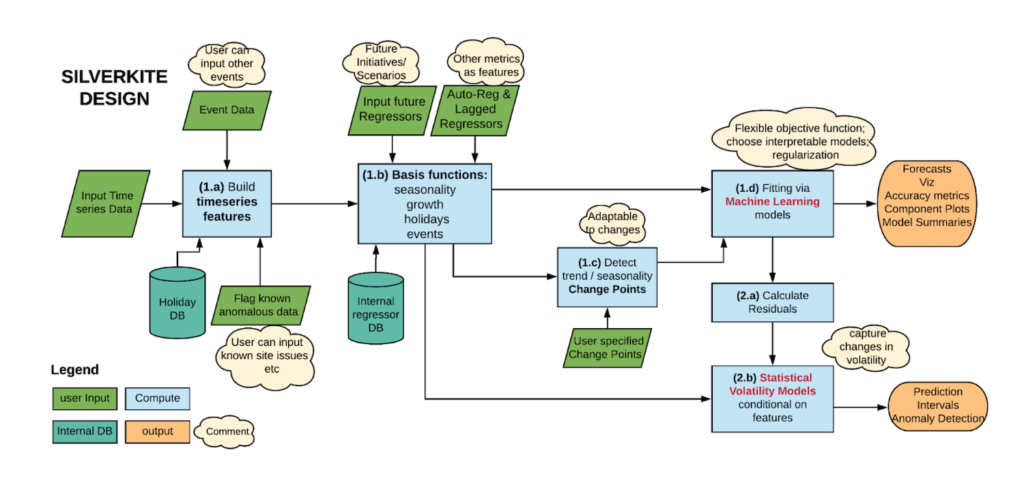

GreyKite encompasses a variety of features that offer valuable functionalities for time series forecasting. 

These include a comprehensive and configurable modeling framework, advanced algorithms, automation process, and dynamic visualization. 

The modeling framework of GreyKite is highly versatile, enabling users to incorporate diverse predictors, as well as adjust the model structure according to their requirements. 

Additionally, the advanced algorithms employed by GreyKite are proficient in handling complex forecasting.tasks, allowing for the accurate and reliable prediction of seasonal patterns and trends. 

The automation process within GreyKite streamlines, the forecasting process, reduce the potential for human error and enhancing reproducibility. 

Finally, the dynamic visualization utilities enable users to examine and interpret forecasting results easily, enhancing the utility and transparency of the forecasting process.

Adopting a flexible approach to design is becoming increasingly necessary in various fields. This is largely due to The dynamic nature of today's environment, which demands quick adaptation and innovation. 

The concept of flexibility in design enables individuals to respond and adjust to changing requirements and emerging opportunities more efficiently. 

Consequently, greater flexibility in design can lead to increased productivity, creativity, and user satisfaction. It is therefore imperative for designers to consider flexibility as a critical factor in The development of effective solutions.

This method facilitates the inclusion of time arrangement regressors in order to detect patterns, anomalies, events, changes, and autoregression. 

Additionally, users are afforded the flexibility to incorporate their own custom regressors.

This proposition is in line with The hypothesis, which involves the utilization of an AI model.

The user interface exhibits an intuitive design that promotes ease of navigation and use for individuals with varying levels of technological proficiency.

This technology provides remarkable analytical tools for examining variability, associations, points of transition, and other related phenomena.

We present here model templates, which are deemed efficient based on pertinent data attributes and estimations, such as prolonged daily projections. These templates encompass default boundaries aimed to optimize outputs.

This method yields results that are easily interpretable through The utilization of a model.rundown to examine individual regressors and the implementation of segment plots to visually assess the cumulative impact of correlated regressors.

The term "Extensible Framework" refers to a programmatic infrastructure that enables The expansion and modification of specific functionalities without necessitating the alteration of the original codebase. 

It is a software architecture that is designed to support the development of customizable applications that can adapt to The diverse and evolving needs of its users. 

In essence, it facilitates the creation of modular and scalable software solutions that can be easily extended and adapted to meet the dynamic requirements of a given context. 

In [3]:
# Specifies dataset information
metadata_SILVERKITE = MetadataParam(
     time_col="time_stamps",  # name of the time column
     value_col="Elec_prod_values",  # name of the value column
     freq="MS"  #"MS" for Montly at start date, "H" for hourly, "D" for daily, "W" for weekly, etc.
 )
forecaster_SILVERKITE = Forecaster()
result_SILVERKITE = forecaster_SILVERKITE.run_forecast_config(
     df=Electric_Production_df,
     config=ForecastConfig(
         model_template=ModelTemplateEnum.SILVERKITE.name,
         forecast_horizon=100,  # forecasts 100 steps ahead
         coverage=0.95,  # 95% prediction intervals
         metadata_param=metadata_SILVERKITE
    )
)

# Specifies dataset information
metadata_PROPHET = MetadataParam(
     time_col="time_stamps",  # name of the time column
     value_col="Elec_prod_values",  # name of the value column
     freq="MS"  #"MS" for Montly at start date, "H" for hourly, "D" for daily, "W" for weekly, etc.
 )
forecaster_PROPHET = Forecaster()
result_PROPHET = forecaster_PROPHET.run_forecast_config(
     df=Electric_Production_df,
     config=ForecastConfig(
         model_template=ModelTemplateEnum.PROPHET.name,
         forecast_horizon=100,  # forecasts 100 steps ahead
         coverage=0.95,  # 95% prediction intervals
         metadata_param=metadata_PROPHET
    )
)

Fitting 1 folds for each of 1 candidates, totalling 1 fits


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


DEBUG:cmdstanpy:input tempfile: /tmp/tmphct7v10f/bksb7yhs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphct7v10f/hf6u47pk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79421', 'data', 'file=/tmp/tmphct7v10f/bksb7yhs.json', 'init=/tmp/tmphct7v10f/hf6u47pk.json', 'output', 'file=/tmp/tmphct7v10f/prophet_modelprik9pa5/prophet_model-20230409182618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:26:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:26:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph

In [4]:
time_series_SILVERKITE = result_SILVERKITE.timeseries
fig_SILVERKITE = time_series_SILVERKITE.plot()
plotly.io.show(fig_SILVERKITE)

In [5]:
time_series_PROPHET = result_PROPHET.timeseries
fig_PROPHET = time_series_PROPHET.plot()
plotly.io.show(fig_PROPHET)

In [6]:
grid_search_SILVERKITE = result_SILVERKITE.grid_search
cv_results_SILVERKITE = summarize_grid_search_results(
     grid_search=grid_search_SILVERKITE,
     decimals=2,
     # The below saves space in the printed output. Remove to show all available metrics and columns.
     cv_report_metrics=None,
     column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"])
# Transposes to save space in the printed output
cv_results_SILVERKITE["params"] = cv_results_SILVERKITE["params"].astype(str)
cv_results_SILVERKITE.set_index("params", drop=True, inplace=True)
cv_results_SILVERKITE.transpose()

params,[]
rank_test_MAPE,1
mean_test_MAPE,5.05
split_test_MAPE,"(5.05,)"
mean_train_MAPE,3.83
split_train_MAPE,"(3.83,)"
mean_fit_time,9.51
mean_score_time,1.62


In [7]:
grid_search_PROPHET = result_PROPHET.grid_search
cv_results_PROPHET = summarize_grid_search_results(
     grid_search=grid_search_PROPHET,
     decimals=2,
     # The below saves space in the printed output. Remove to show all available metrics and columns.
     cv_report_metrics=None,
     column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"])
# Transposes to save space in the printed output
cv_results_PROPHET["params"] = cv_results_PROPHET["params"].astype(str)
cv_results_PROPHET.set_index("params", drop=True, inplace=True)
cv_results_PROPHET.transpose()

params,[]
rank_test_MAPE,1
mean_test_MAPE,3.82
split_test_MAPE,"(3.82,)"
mean_train_MAPE,1.93
split_train_MAPE,"(1.93,)"
mean_fit_time,2.01
mean_score_time,3.36


In [8]:
backtest_SILVERKITE = result_SILVERKITE.backtest
fig_SILVERKITE = backtest_SILVERKITE.plot()
plotly.io.show(fig_SILVERKITE)

In [9]:
backtest_PROPHET = result_PROPHET.backtest
fig_PROPHET = backtest_PROPHET.plot()
plotly.io.show(fig_PROPHET)

In [10]:
backtest_eval_SILVERKITE = defaultdict(list)
for metric, value in backtest_SILVERKITE.train_evaluation.items():
    backtest_eval_SILVERKITE[metric].append(value)
    backtest_eval_SILVERKITE[metric].append(backtest_SILVERKITE.test_evaluation[metric])
metrics_SILVERKITE = pd.DataFrame(backtest_eval_SILVERKITE, index=["train", "test"]).T
metrics_SILVERKITE

,train,test
CORR,0.949599,0.765099
R2,0.901739,0.545473
MSE,19.622058,44.467255
RMSE,4.429679,6.668377
MAE,3.323134,5.276958
MedAE,2.37511,4.141279
MAPE,3.936506,5.150075
MedAPE,3.021842,4.099898
sMAPE,1.955192,2.56995
Q80,1.661567,2.771953


In [11]:
backtest_eval_PROPHET = defaultdict(list)
for metric, value in backtest_PROPHET.train_evaluation.items():
    backtest_eval_PROPHET[metric].append(value)
    backtest_eval_PROPHET[metric].append(backtest_PROPHET.test_evaluation[metric])
metrics_PROPHET = pd.DataFrame(backtest_eval_PROPHET, index=["train", "test"]).T
metrics_PROPHET

,train,test
CORR,0.987717,0.917239
R2,0.975584,0.647417
MSE,4.875627,34.493858
RMSE,2.208082,5.873147
MAE,1.690534,4.977721
MedAE,1.39071,4.689439
MAPE,2.019932,5.074415
MedAPE,1.700752,4.375945
sMAPE,1.00942,2.454951
Q80,0.845146,1.304882


In [12]:
forecast_SILVERKITE = result_SILVERKITE.forecast
fig_SILVERKITE = forecast_SILVERKITE.plot()
plotly.io.show(fig_SILVERKITE)

In [13]:
forecast_PROPHET = result_PROPHET.forecast
fig_PROPHET = forecast_PROPHET.plot()
plotly.io.show(fig_PROPHET)

In [14]:
forecast_SILVERKITE.df.head().round(2)

,time_stamps,actual,forecast,forecast_lower,forecast_upper
0,1985-01-01,72.51,76.21,66.38,86.05
1,1985-02-01,70.67,64.66,54.82,74.50
2,1985-03-01,62.45,64.73,54.89,74.57
3,1985-04-01,57.47,66.18,56.34,76.02
4,1985-05-01,55.32,55.92,46.08,65.76


In [15]:
forecast_PROPHET.df.head().round(2)

,time_stamps,actual,forecast,forecast_lower,forecast_upper
0,1985-01-01,72.51,74.35,69.44,78.97
1,1985-02-01,70.67,66.47,61.93,71.65
2,1985-03-01,62.45,60.36,55.09,65.25
3,1985-04-01,57.47,56.42,51.40,61.43
4,1985-05-01,55.32,52.31,47.16,57.48


In [16]:
fig_SILVERKITE = forecast_SILVERKITE.plot_components()
plotly.io.show(fig_SILVERKITE)     # fig.show() if you are using "PROPHET" template

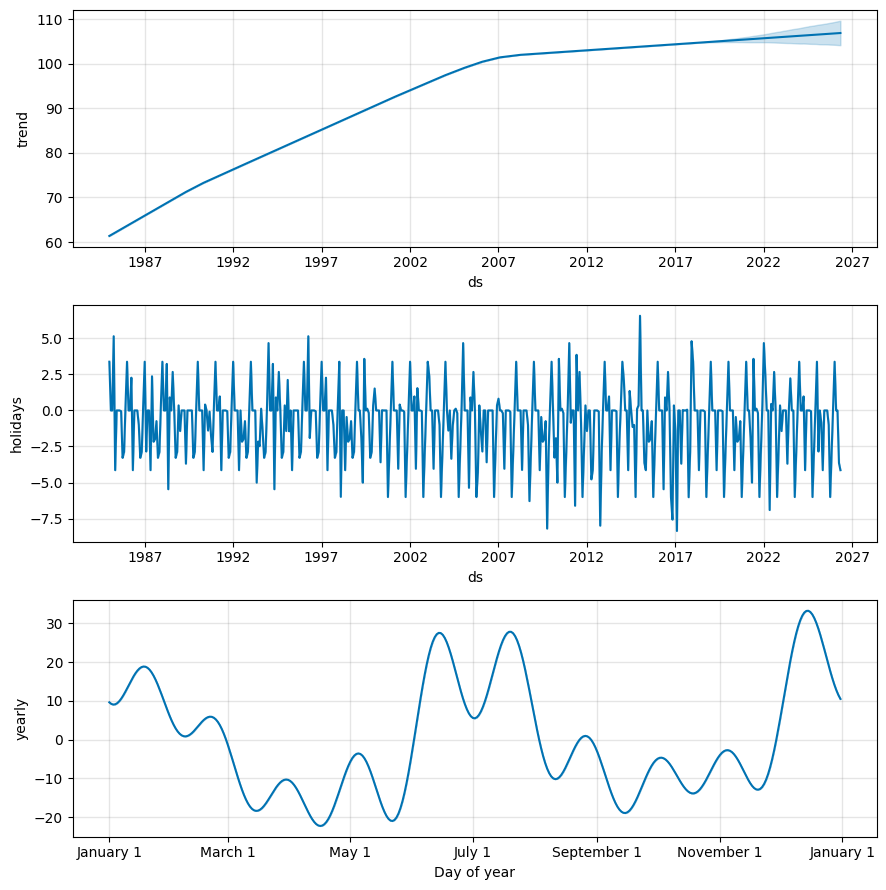

In [17]:
fig_PROPHET = forecast_PROPHET.plot_components()
fig_PROPHET

In [18]:
summary_SILVERKITE = result_SILVERKITE.model[-1].summary()  # -1 retrieves the estimator from the pipeline
print(summary_SILVERKITE)

================================ Model Summary =================================

Number of observations: 397,   Number of features: 59
Method: Ridge regression
Number of nonzero features: 25
Regularization parameter: 0.02807

Residuals:
         Min           1Q       Median           3Q          Max
      -17.42       -2.801      0.01553        2.932        14.34

            Pred_col Estimate Std. Err Pr(>)_boot sig. code             95%CI
           Intercept    64.58   0.5667     <2e-16       ***    (63.49, 65.59)
 events_C...New Year    1.459    1.135      0.222            (-0.6593, 3.843)
 events_C...w Year-1    1.459    1.135      0.222            (-0.6593, 3.843)
 events_C...w Year-2    3.617    1.825      0.032         *       (0., 6.368)
 events_C...w Year+1    3.562    2.354      0.114             (-1.088, 8.122)
 events_C...w Year+2   -2.806    2.455      0.292             (-7.191, 1.538)
events_Christmas Day       0.       0.      1.000                    (0., 0.)
 events

In [19]:
result_PROPHET.model

Pipeline(steps=[('input',
                 PandasFeatureUnion(transformer_list=[('date',
                                                       Pipeline(steps=[('select_date',
                                                                        ColumnSelector(column_names=['ts']))])),
                                                      ('response',
                                                       Pipeline(steps=[('select_val',
                                                                        ColumnSelector(column_names=['y'])),
                                                                       ('outlier',
                                                                        ZscoreOutlierTransformer()),
                                                                       ('null',
                                                                        NullTransformer(impute_algorithm='interpolate',
                                                                                        impute_params={'axis': 0,
                                                                                                       'limit_direct...
2   1984-02-20      Washington's Birthday            -2             2
3   1984-05-28               Memorial Day            -2             2
4   1984-07-04           Independence Day            -2             2
..         ...                        ...           ...           ...
396 2026-10-02               National Day            -2             2
397 2026-10-03               National Day            -2             2
398 2026-04-05          Tomb-Sweeping Day            -2             2
399 2026-06-19       Dragon Boat Festival            -2             2
400 2026-09-25        Mid-Autumn Festival            -2             2

[2528 rows x 4 columns],
                                  score_func=<function add_finite_filter_to_scorer.<locals>.score_func_finite at 0x7f820d5e7040>))])